# Data Cleaning
This is focuses on the data cleaning features of the Pandas library. This topic is going to cover:
-  Converting Values
- Splitting 
- Joining Columns

There are 3 projects to working on:
- A Century of Top Songs
- A Plant-Based Coffee Shop
- Flight Delays


## A Century of Top Songs

In [4]:
import pandas as pd

df = pd.read_csv('./top-songs-project/top-song-durations.csv')
df.head(5)

,year,artist,title,duration
0,2023,Morgan Wallen,Last Night,00:02:43
1,2022,Glass Animals,Heat Waves,00:03:58
2,2021,Dua Lipa,Levitating,00:03:23
3,2020,The Weeknd,Blinding Lights,00:03:20
4,2019,Lil Nas X feat. Billy Ray Cyrus,Old Town Road,00:02:37


Looking for the shortest song of dataset

In [5]:
df.query('duration == duration.min()')

,year,artist,title,duration
95,1928,Al Jolson,Sonny Boy,00:01:55


Plotting the duration over the years

Text(0, 0.5, 'Duration (seconds)')

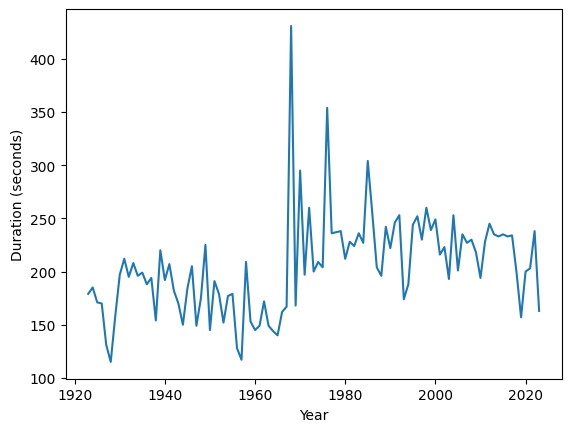

In [11]:
import matplotlib.pyplot as plt

# Split the duration column into hours, minutes, and seconds
split_duration = df['duration'].str.split(':', expand=True)
split_duration = split_duration.astype(int)
df[['h', 'm', 's']] = split_duration

# Calculate total duration in seconds
df['total_seconds'] = df.eval('h * 3600 + m * 60 + s')

# Plot the total duration in seconds over the years
plt.plot(df['year'], df['total_seconds'])
plt.xlabel('Year')
plt.ylabel('Duration (seconds)')





In [13]:
# The longest top-hit song 
df.query('total_seconds == total_seconds.max()')

,year,artist,title,duration,h,m,s,total_seconds
55,1968,The Beatles,Hey Jude,00:07:11,0,7,11,431


## A Plant-Based Coffee Shop

In [18]:
survey = pd.read_csv('./coffee-survey-project/coffee-survey-results.csv')
survey.head(5)

,SubmissionID,What is your age range?,How many cups of coffee do you consume per day?,Do you add any dairy or dairy alternative to your coffee?,What kind of dairy? (Whole milk),What kind of dairy? (Skim milk),What kind of dairy? (Half and half),What kind of dairy? (Coffee creamer),What kind of dairy? (Flavored creamer),What kind of dairy? (Oat milk),...,What kind of sugar or sweetener? (Raw Sugar),How do you brew your coffee? (Pour over),How do you brew your coffee? (French press),How do you brew your coffee? (Espresso),How do you brew your coffee? (Coffee brewing machine),How do you brew your coffee? (Pod/capsule machine),How do you brew your coffee? (Instant coffee),How do you brew your coffee? (Bean-to-cup machine),How do you brew your coffee? (Cold brew),How do you brew your coffee? (Coffee extract)
0,VZbv6N,35-44,< 1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,jBGZBQ,25-34,< 1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7d9809,18-24,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,bl62ee,45-54,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,BGbJ9Q,25-34,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Select the columns related to dairy preferences
needed_columns = [
    "What kind of dairy? (Whole milk)",
    "What kind of dairy? (Skim milk)",
    "What kind of dairy? (Half and half)",
    "What kind of dairy? (Coffee creamer)",
    "What kind of dairy? (Flavored creamer)",
    "What kind of dairy? (Oat milk)",
    "What kind of dairy? (Almond milk)",
    "What kind of dairy? (Soy milk)"
]

# Create a new DataFrame with only the needed columns
dairy = survey[needed_columns]
dairy.head(5)

,What kind of dairy? (Whole milk),What kind of dairy? (Skim milk),What kind of dairy? (Half and half),What kind of dairy? (Coffee creamer),What kind of dairy? (Flavored creamer),What kind of dairy? (Oat milk),What kind of dairy? (Almond milk),What kind of dairy? (Soy milk)
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [23]:
# Rename the columns to be more descriptive
name_map = {
    'What kind of dairy? (Whole milk)': 'Whole milk',
    'What kind of dairy? (Skim milk)': 'Skim milk',
    'What kind of dairy? (Half and half)': 'Half and half',
    'What kind of dairy? (Coffee creamer)': 'Coffee creamer',
    'What kind of dairy? (Flavored creamer)': 'Flavored creamer',
    'What kind of dairy? (Oat milk)': 'Oat milk',
    'What kind of dairy? (Almond milk)': 'Almond milk',
    'What kind of dairy? (Soy milk)': 'Soy milk',
}

dairy = dairy.rename(columns=name_map)
dairy

,Whole milk,Skim milk,Half and half,Coffee creamer,Flavored creamer,Oat milk,Almond milk,Soy milk
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1165,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1166,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
dairy = dairy.dropna()
dairy

,Whole milk,Skim milk,Half and half,Coffee creamer,Flavored creamer,Oat milk,Almond milk,Soy milk
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1165,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1166,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 0, 'Percent (%)')

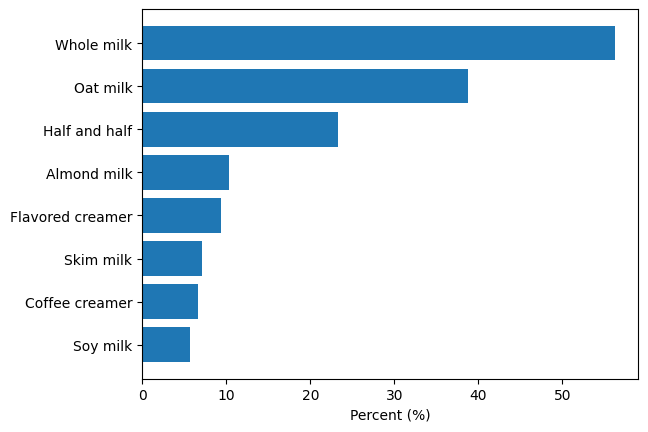

In [38]:
dairy_preferences = round(dairy.mean() * 100, 2)
dairy_preferences.sort_values(inplace=True)

# Plot the dairy preferences
plt.barh(dairy_preferences.index, dairy_preferences.values)
plt.xlabel('Percent (%)')


## Flight Delays

In [43]:
flights = pd.read_csv('./flight-delays-project/flights.csv')
flights.head(5)

,scheduled,actual,carrier,flight,tailnum,origin,dest,air_time,distance
0,"04/29/2023, 16:35","04/29/2023, 17:01",WN,1079,N230WN,ATL,HOU,110.0,696
1,"07/02/2023, 15:10","07/02/2023, 15:05",DL,355,N953AT,ATL,GPT,54.0,352
2,"12/25/2023, 10:55","12/25/2023, 10:53",WN,291,N413WN,ATL,RDU,57.0,356
3,"09/01/2023, 12:50","09/01/2023, 12:48",DL,1132,N947DZ,ATL,TYS,28.0,152
4,"12/14/2023, 07:05","12/14/2023, 07:02",DL,40,N332DN,ATL,BOS,121.0,946


In [49]:
# Create a new DataFrame with only the scheduled and actual departure times
depature = flights[['scheduled', 'actual']].copy()

# Convert the scheduled and actual departure times to datetime
depature['actual'] = pd.to_datetime(depature['actual'])
depature['scheduled'] = pd.to_datetime(depature['scheduled'])
depature

,scheduled,actual
0,2023-04-29 16:35:00,2023-04-29 17:01:00
1,2023-07-02 15:10:00,2023-07-02 15:05:00
2,2023-12-25 10:55:00,2023-12-25 10:53:00
3,2023-09-01 12:50:00,2023-09-01 12:48:00
4,2023-12-14 07:05:00,2023-12-14 07:02:00
...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00
4996,2023-04-09 19:50:00,2023-04-09 19:58:00
4997,2023-12-14 13:20:00,2023-12-14 13:16:00
4998,2023-12-06 13:05:00,2023-12-06 13:01:00


In [51]:
# Calculate the delay 
depature['delay'] = depature.eval('actual - scheduled')
depature['is_late'] = depature['delay'].dt.total_seconds() > 900
depature

,scheduled,actual,delay,is_late
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00,True
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False
...,...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00,False


In [52]:
# Get the day of the week
depature['day_name'] = depature['actual'].dt.strftime('%a')
depature 

,scheduled,actual,delay,is_late,day_name
0,2023-04-29 16:35:00,2023-04-29 17:01:00,0 days 00:26:00,True,Sat
1,2023-07-02 15:10:00,2023-07-02 15:05:00,-1 days +23:55:00,False,Sun
2,2023-12-25 10:55:00,2023-12-25 10:53:00,-1 days +23:58:00,False,Mon
3,2023-09-01 12:50:00,2023-09-01 12:48:00,-1 days +23:58:00,False,Fri
4,2023-12-14 07:05:00,2023-12-14 07:02:00,-1 days +23:57:00,False,Thu
...,...,...,...,...,...
4995,2023-11-15 14:20:00,2023-11-15 14:17:00,-1 days +23:57:00,False,Wed
4996,2023-04-09 19:50:00,2023-04-09 19:58:00,0 days 00:08:00,False,Sun
4997,2023-12-14 13:20:00,2023-12-14 13:16:00,-1 days +23:56:00,False,Thu
4998,2023-12-06 13:05:00,2023-12-06 13:01:00,-1 days +23:56:00,False,Wed


In [58]:
# Percentage flights delayed by day of week
proportion_delayed = depature.groupby('day_name')['is_late'].mean()
percent_delayed = proportion_delayed * 100
percent_delayed # Display series

day_name
Fri    22.593583
Mon    20.185923
Sat    18.558282
Sun    23.376623
Thu    20.939597
Tue    15.419847
Wed    16.691285
Name: is_late, dtype: float64

In [59]:
# Plot the data
new_index_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
percent_delayed = percent_delayed.reindex(new_index_order)
percent_delayed

day_name
Sun    23.376623
Mon    20.185923
Tue    15.419847
Wed    16.691285
Thu    20.939597
Fri    22.593583
Sat    18.558282
Name: is_late, dtype: float64

Text(0, 0.5, 'Percent Delayed (%)')

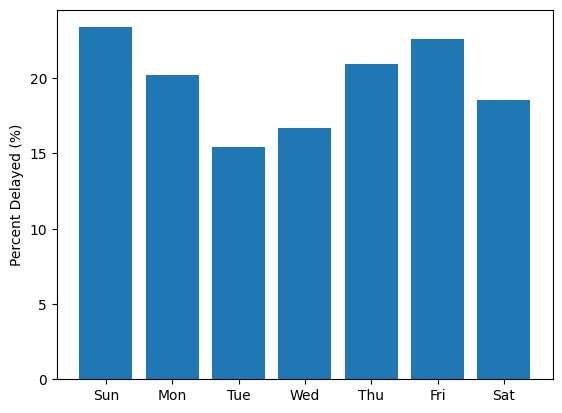

In [62]:
plt.bar(percent_delayed.index, percent_delayed.values)
plt.ylabel('Percent Delayed (%)')